## TS

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
import re
from bs4 import BeautifulSoup



%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/dataset_penyisihan_bdc_2024(in).csv', delimiter = ';')
df = df[pd.notnull(df['label'])]
print(df.head(20))

                                                 text                    label
0   Kunjungan Prabowo ini untuk meresmikan dan men...         Sumber Daya Alam
1   RT Anies dapat tepuk tangan meriah saat jadi R...                  Politik
2   @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...                Demografi
3   RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...                  Politik
4   Anies Baswedan Harap ASN termasuk TNI dan Polr...                  Politik
5   RT Duh jangan sampai Pak lurah denger nih Ã°ÂŸ...                  Politik
6   Prabowo minta Kemenhan dan Tim Satgas Air Unha...  Pertahanan dan Keamanan
7   RT Anies: Ya Allah Sibukkanlah Orang Zalim Aga...                  Politik
8   RT Abah @znOMP7ZMVU9dMuMNA/cIazC9q5+hgwVkTsQNd...                  Politik
9   RT Bawaslu dimaki "JANCUK" sama warga garaÃ‚Â²...                  Politik
10  RT Beberapa isu basi terkait @hs5jZceksZrPM0Ni...                 Ideologi
11  RT Ganjar Pranowo-Mahfud MD menekankan penting..

In [ ]:
df['label'].unique()

array(['Sumber Daya Alam', 'Politik', 'Demografi',
       'Pertahanan dan Keamanan', 'Ideologi', 'Ekonomi', 'Sosial Budaya',
       'Geografi'], dtype=object)

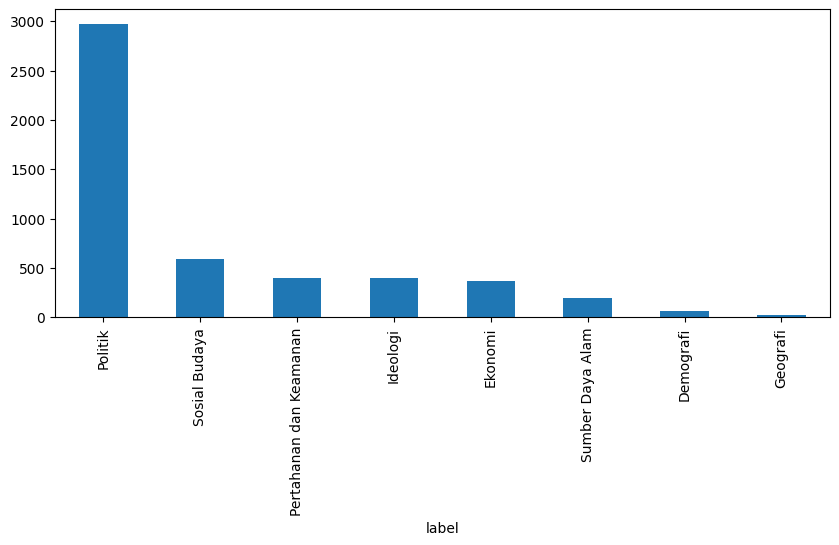

In [ ]:
my_labels = ['Sumber Daya Alam', 'Politik', 'Demografi',
       'Pertahanan dan Keamanan', 'Ideologi', 'Ekonomi', 'Sosial Budaya',
       'Geografi']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [ ]:
def print_plot(index):
    example = df[df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

print_plot(10)

RT Beberapa isu basi terkait @hs5jZceksZrPM0NiWtKnsbSbZ1XyaZtU4OHkKgrcDk8= / @wEOWbjbQXX93e2r1/7iXQ1mV/pxGE9yrnUdgURpW0Y0= dan fakta sebenarnya bisa dilihat di https://t.co/3aR3K0Plf4. Beberapa diantaranya: Ã¢Â€Â¢ Anies akan mengganti Pancasila dengan sistem Khilafah: https://t.co/jfzZ6vpU11 Ã¢Â€Â¢ Terkait toleransi berbagai penganut agamaÃ¢Â€Â”Anies blunder soal data rumah ibadah di Jakarta: https://t.co/nGdOmaVOEO Ã¢Â€Â¢ Anies mengkhianati Prabowo untuk jadi Capres: https://t.co/ioe8x09UpZ Saat kebenaran dan fakta atas suatu hal telah jelas, tapi tetap disangkalÃ¢Â€Â”entah karena niat jahat, nafsu, atau kepentingan pribadiÃ¢Â€Â¦benar bahwa seringkali yang buta itu bukan mata, tapi hati yang buta. [RE borryshasian]
Tag: Ideologi


In [ ]:
print_plot(20)

RT Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup.. #AMINAjaDulu https://t.co/txIvBhLvn2 [RE ekowboy2]
Tag: Sosial Budaya


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('indonesian'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

df['label'] = df['label'].apply(clean_text)
print(df.head(10))

                                                text                label
0  Kunjungan Prabowo ini untuk meresmikan dan men...     sumber daya alam
1  RT Anies dapat tepuk tangan meriah saat jadi R...              politik
2  @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...            demografi
3  RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...              politik
4  Anies Baswedan Harap ASN termasuk TNI dan Polr...              politik
5  RT Duh jangan sampai Pak lurah denger nih Ã°ÂŸ...              politik
6  Prabowo minta Kemenhan dan Tim Satgas Air Unha...  pertahanan keamanan
7  RT Anies: Ya Allah Sibukkanlah Orang Zalim Aga...              politik
8  RT Abah @znOMP7ZMVU9dMuMNA/cIazC9q5+hgwVkTsQNd...              politik
9  RT Bawaslu dimaki "JANCUK" sama warga garaÃ‚Â²...              politik


In [ ]:
df['label'].apply(lambda x: len(x.split(' '))).sum()

6371

In [ ]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



indonesian_stopwords = stopwords.words('indonesian')


pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=indonesian_stopwords)),  # Menghapus stop words
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)),
])

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigram dan Bigram
    'clf__alpha': [1e-4, 1e-3, 1e-2],       # Penyesuaian regularisasi alpha
    'clf__penalty': ['l2', 'l1', 'elasticnet'],  # Eksplorasi penalti yang berbeda
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# %%time

y_pred = grid_search.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


accuracy 0.7773333333333333
                         precision    recall  f1-score   support

       Sumber Daya Alam       0.33      0.09      0.14        23
                Politik       0.81      0.64      0.72       103
              Demografi       0.00      0.00      0.00         6
Pertahanan dan Keamanan       0.91      0.54      0.67       114
               Ideologi       0.81      0.62      0.70       135
                Ekonomi       0.78      0.95      0.86       881
          Sosial Budaya       0.69      0.55      0.61       178
               Geografi       0.68      0.25      0.37        60

               accuracy                           0.78      1500
              macro avg       0.63      0.45      0.51      1500
           weighted avg       0.77      0.78      0.76      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_unlabeled = pd.read_csv('/content/sample_data/dataset_unlabeled_penyisihan_bdc_2024(in).csv',delimiter = ';')
df_unlabeled.head(5)

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...


In [ ]:
df_unlabeled.Text = df_unlabeled.Text.apply(clean_text)
print_plot(10)

RT Beberapa isu basi terkait @hs5jZceksZrPM0NiWtKnsbSbZ1XyaZtU4OHkKgrcDk8= / @wEOWbjbQXX93e2r1/7iXQ1mV/pxGE9yrnUdgURpW0Y0= dan fakta sebenarnya bisa dilihat di https://t.co/3aR3K0Plf4. Beberapa diantaranya: Ã¢Â€Â¢ Anies akan mengganti Pancasila dengan sistem Khilafah: https://t.co/jfzZ6vpU11 Ã¢Â€Â¢ Terkait toleransi berbagai penganut agamaÃ¢Â€Â”Anies blunder soal data rumah ibadah di Jakarta: https://t.co/nGdOmaVOEO Ã¢Â€Â¢ Anies mengkhianati Prabowo untuk jadi Capres: https://t.co/ioe8x09UpZ Saat kebenaran dan fakta atas suatu hal telah jelas, tapi tetap disangkalÃ¢Â€Â”entah karena niat jahat, nafsu, atau kepentingan pribadiÃ¢Â€Â¦benar bahwa seringkali yang buta itu bukan mata, tapi hati yang buta. [RE borryshasian]
Tag: ideologi


In [ ]:
y_pred_2 = grid_search.predict(df_unlabeled.Text)

In [ ]:
y_pred_2

array(['politik', 'politik', 'ideologi', 'politik', 'politik', 'politik',
       'politik', 'politik', 'politik', 'ekonomi', 'politik', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'ekonomi',
       'politik', 'politik', 'politik', 'politik', 'ekonomi', 'geografi',
       'ekonomi', 'politik', 'politik', 'politik', 'politik', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'ekonomi',
       'politik', 'ekonomi', 'politik', 'ekonomi', 'ekonomi', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'politik',
       'politik', 'sosial budaya', 'politik', 'politik', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'politik',
       'politik', 'politik', 'politik', 'politik', 'politik', 'politik',
       'politik', 'politik', 'pertahanan keamanan', 'politik', 'ekonomi',
       'politik', 'sumber daya alam', 'politik', 'pol

In [ ]:
df_unlabeled.loc[:,'Kelas'] = y_pred_2

In [ ]:
df_unlabeled

,IDText,Text,Kelas
0,TXT0001,lu org2 prodemokrasi negara kesempatan ngelawa...,politik
1,TXT0002,prabowo hutang negeri hutang negeri indonesia ...,politik
2,TXT0003,kikidaliyo ganjar pranowo beliau sosok mengagu...,ideologi
3,TXT0004,prabowo gibran kesejahteraan rakyat,politik
4,TXT0005,yg gak nyambung junjungan elu aomkmkmkmkngomon...,politik
...,...,...,...
995,TXT0996,bikin bangga deh ganjarmahfud alokasikan belan...,politik
996,TXT0997,jokowi pilpres 2024 berbesar hati merangkul pr...,politik
997,TXT0998,sbaiknya si gemot nga ikutan debat dehnga maun...,politik
998,TXT0999,kebiasaan merembuk bermusyawarah gaya kepemimp...,ekonomi


In [ ]:
answer = pd.DataFrame()
answer.loc[:,'IDText'] = df_unlabeled.IDText
answer.loc[:,'Kelas'] = df_unlabeled.Kelas

In [ ]:
answer.tail(15)

,IDText,Kelas
985,TXT0986,politik
986,TXT0987,pertahanan keamanan
987,TXT0988,pertahanan keamanan
988,TXT0989,politik
989,TXT0990,politik
990,TXT0991,politik
991,TXT0992,politik
992,TXT0993,politik
993,TXT0994,politik
994,TXT0995,politik


In [ ]:
answer.to_csv('SD2024040000418_Hunter.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
